In [1]:
# Import Dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import requests as requests
import time
from scipy import stats 
#import linregress
import json

In [2]:
#CDC COVID-19 vaccination in the US url
vax_url = "https://data.cdc.gov/resource/8xkx-amqh"

In [3]:
#request API and get json objects

# vax_response = requests.get(vax_url).json()
# vax_response

In [4]:
# len(vax_response)

In [5]:
# vax_url = "https://data.cdc.gov/resource/8xkx-amqh"
# #request API and get json objects

# # vax_response = requests.get(vax_url).json()
# # vax_response

# df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$limit=25000")
# ##df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where=date_extract_y(date)<2021&$limit=25000")


In [6]:
# vax_response = requests.get("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                   "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)")
# vax_response_json=vax_response.json()

In [7]:
# # increasing the data rows to be pulled to a count
# df = pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                  "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)&$limit=25000")

In [8]:
#df.info()

In [9]:
#new_df=df[["date","recip_county"]]


In [10]:
#new_df.head()

In [11]:
#CDC COVID-19 mortality rate in the US by age and sex url
mort_url = "https://data.cdc.gov/resource/9bhg-hcku"

In [12]:
#Data frame of the CDC COVID-19 mortality rate in the US by age and sex as of 09/30/2021
#df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$where="
#                  "(date_extract_y(end_date)%20%3C=%202021%20AND%20date_extract_m(end_date)%20%3C=9)&$limit=500000")

In [13]:
df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$limit=1000000")
                

In [14]:
len(df_mort)

68850

In [15]:
# Displaying one record 
df_mort.iloc[500]

data_as_of                                                 2021-10-20T00:00:00.000
start_date                                                 2020-01-01T00:00:00.000
end_date                                                   2021-10-16T00:00:00.000
group                                                                     By Total
state                                                         District of Columbia
sex                                                                         Female
age_group                                                              25-34 years
covid_19_deaths                                                                NaN
total_deaths                                                                 116.0
pneumonia_deaths                                                              10.0
pneumonia_and_covid_19_deaths                                                  NaN
influenza_deaths                                                               0.0
pneu

In [16]:
#data frame with required fields
new_df=df_mort[["group","year","month","state","sex","age_group","covid_19_deaths",
                "total_deaths"]]
pd.options.display.float_format = "{:.0f}".format

In [17]:
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,723880,5928410
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,132,33432
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,542,59268
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,63,6236
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,172,9911
...,...,...,...,...,...,...,...,...
68845,By Month,2021,10,Puerto Rico,Female,50-64 years,NaN,21
68846,By Month,2021,10,Puerto Rico,Female,55-64 years,NaN,17
68847,By Month,2021,10,Puerto Rico,Female,65-74 years,NaN,19
68848,By Month,2021,10,Puerto Rico,Female,75-84 years,NaN,29


In [18]:
new_df.drop(new_df.loc[(new_df["month"] == 10)&(new_df["year"] == 2021)].index, inplace=True)

In [19]:
#Dropping data for age_groups -"Under 1 year", "1-4 years", "All Ages","5-14 years","15-24 years"
# and "25-34 years" , "35-44 years",  "45-54 years",  "55-64 years"

new_df.drop(new_df.loc[new_df["age_group"]=="Under 1 year"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="1-4 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="All Ages"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="5-14 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="15-24 years"].index, inplace=True)


new_df.drop(new_df.loc[new_df["age_group"]=="25-34 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="35-44 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="45-54 years"].index, inplace=True) 
new_df.drop(new_df.loc[new_df["age_group"]=="55-64 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["state"]=="United States"].index, inplace=True)



In [20]:
new_df["age_group"].unique()

array(['0-17 years', '18-29 years', '30-39 years', '40-49 years',
       '50-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [21]:
new_df.reset_index()

,index,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,53,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,NaN,1270
1,57,By Total,NaN,NaN,Alabama,All Sexes,18-29 years,97,2197
2,59,By Total,NaN,NaN,Alabama,All Sexes,30-39 years,290,3219
3,61,By Total,NaN,NaN,Alabama,All Sexes,40-49 years,752,5485
4,63,By Total,NaN,NaN,Alabama,All Sexes,50-64 years,3167,21930
...,...,...,...,...,...,...,...,...,...
30523,68792,By Month,2021,9,Puerto Rico,Female,40-49 years,NaN,27
30524,68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
30525,68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
30526,68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [22]:
# Mortality rate Vs Gender  - Data for Pie Chart
gender_df=new_df.groupby(by=["sex"]).sum()
gender_df = gender_df.drop("year",1)
gender_df = gender_df.drop("month",1)
update_df = gender_df.drop('All Sexes')



In [23]:
update_df

,covid_19_deaths,total_deaths
sex,,
Female,965456,8470478
Male,1187454,9426288


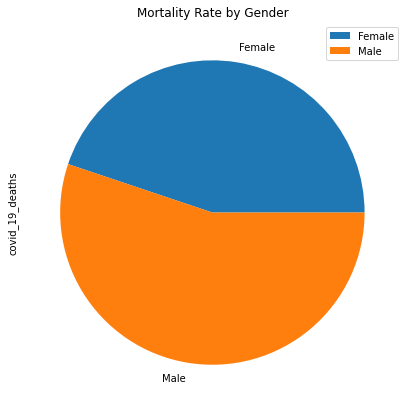

In [24]:
labels = "Females", "Male"
sizes=update_df["covid_19_deaths"]
#plt.pie(sizes,labels=labels);
#plt.title("Mortality Rate by Gender");
#plt.show()
plot = update_df.plot.pie(y='covid_19_deaths', figsize=(7, 7), title="Mortality Rate by Gender")
plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/Mortalityratebygender.png")
        

In [27]:
#Mortality rate by age group - Data for scatter plot

age_group_df=new_df.groupby(by=["age_group"]).sum()
age_group_df = age_group_df.drop("year",1)
age_group_df = age_group_df.drop("month",1)
covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()
total_deaths_sum = age_group_df["total_deaths"]

covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()

age_group_df

,covid_19_deaths,total_deaths
age_group,,
0-17 years,1256,353138
18-29 years,19536,679629
30-39 years,64338,987094
40-49 years,168517,1478254
50-64 years,770258,6030942
65-74 years,977642,7277712
75-84 years,1137455,8660464
85 years and over,1177960,10333020


In [26]:
g1 = age_group_df.loc[age_group_df["generation"]==1,:]
# dataframe.plot.scatter() method
g1.plot.scatter('age_group', 'covid_19_deaths');
#x =age_group_df
#y = 

#plt.scatter(x, y)
#plt.show()

KeyError: 'generation'

In [ ]:
#
#covid_19_deaths_sum()

In [ ]:
#Mortality By state - Data horizontal bar graph
state_df=new_df.groupby(by=["state"]).sum()
state_df.loc['New York'] += state_df.loc['New York City']
state_df.drop(['New York City'], inplace=True)
state_df = state_df.drop("year",1)
state_df = state_df.drop("month",1)


In [ ]:
state_df

In [ ]:
sorted_state_df= state_df.sort_values("covid_19_deaths",ascending=False)

In [ ]:
# Mortlaity by State counts sorted in descending order
sorted_state_df["covid_19_deaths"]

In [ ]:
#Mortality rate for Gender types for different age groups - Stacked bar graph

gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
gender_agegroup_df = gender_agegroup_df.drop("year",1)
gender_agegroup_df = gender_agegroup_df.drop("month",1)

In [ ]:
gender_agegroup_df

In [ ]:
#Mortality total count per year 

Year_group_df=new_df.groupby(by=["year"]).sum()

Year_group_df

In [ ]:
#Mortality rate for Year for different age groups 

Year_Month_df=new_df.groupby(by=["year","month"]).sum()
#gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
Year_Month_df


In [ ]:
Year_Month_df["covid_19_deaths"]